# Machine Learning 基础

## 概念基础

### 机器学习

> **机器学习**：A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.（特定的程序用来描述从经验 E 中学习，用于解决任务 T，达到性能度量 P，当且仅当有了经验 E 后并通过了 P 判断。）

通俗来讲，人的“经验”对应计算机中的“数据”，让计算机来学习这些经验数据，生成一个算法模型，在面对新的情况中，计算机能够做出有效的判断，就是*机器学习*。

在 *Mitchell* 的书中定义就是上方引用的，假设：

* P：计算机程序在某任务 T 上的性能；
* T：计算机程序希望实现的任务类；
* E：表示经验，即历史的数据集；

若该计算机通过利用经验 E 在任务 T 上获得了性能 P 的改善，则称改程序对经验 E 进行了学习。

### 学习算法

> **学习算法**：机器学习所研究的主要内容，是关于在计算机上从数据中产生**模型**的算法，称为*学习算法(learning algorithm)*。

有了学习算法，我们把经验数据提供给它，就能基于这些数据产生模型；在面对新的情况时，模型会给我们提供相应的判断。

### 基本术语

先基于一个场景来思考，假设我们收集了一批西瓜的数据，例如：（色贼=青绿；根蒂=蜷缩；敲声=浊响），（色泽=乌黑；根蒂=稍蜷；敲声=沉闷），（色泽=浅自；根蒂=硬挺；敲声=清脆）……每个括号里是一个西瓜的记录，定义：

* 所有记录的集合为：**数据集**；
* 每一条记录为一个**实例（instance）**或**样本（sample）**；
* 单个的特点称为**特征（feature）**或**属性（attribute）**，该例中例如色泽或敲声；
* 对于一条记录，如果在坐标轴上表示，每个西瓜都可以都可以用坐标轴中的一个点表示，一个也是一个**向量（vector）**，例如（青绿，蜷缩，浊响），即每个西瓜为一个**特征向量（feature vector）**；
* 一个样本的特征数为**维数（dimensionality）**，例中西瓜的纬子维数是 3，当维数非常大时，则会有“维数灾难”。

在计算机程序学习经验数据生成算法模型的过程中，每一条记录称为一个**训练样本（training sample）**，同事在训练好模型后，我们希望使用新的样本来测试模型效果，则每个新的样本则策划能为一个**测试样本（test sample）**。

* 所有训练样本的集合为**训练集（trainning set）**，具有特殊性；
* 所有测试样本的集合为**测试集（test set）**，具有一般性；
* 机器学习出来的模型适用于新样本的能力称为：**泛化能力（generalization）**，即从特殊性到一般性能力方法。

在西瓜的例子中，我们是想计算机通过学习西瓜的特征数据，训练处一个决策模型，来判断一个新的西瓜是否是好瓜。可以得知我们预测的是：**西瓜是好事坏，即好瓜和差瓜两种，这是一个离散值**。同样的思路我们也可以通过历年的人口普查数据来预测未来年份人口数量，而人口数量是连续值。

* 预测值为离散值的问题为：**分类（classification）问题**。
* 预测值为连续值的问题为：**回归（regression）问题**。

预测西瓜的好坏过程中，很明显对于训练集中的西瓜，事先已经知道了是否是好瓜，*学习器（learner）*通过学习这些好瓜和差瓜的特征，总结规律，即训练集中的西瓜我们做了标记，车归纳为*标记信息（lable）*。

* 训练数据有标记信息的学习任务：**监督学习（supervised learning）**，容易知道上面锁描述的分类和回归都是监督学习的范畴。
* 训练数据没有标记信息的学习任务为：**无监督学习（unsupervised learning）**，常见的有聚类和关联规则。




## 假设空间

### 归纳和演绎

**归纳（induction）**与**演绎（deduction）**是科学推理的两大手段，前者是从特殊到一般的**“泛化”（generalization）**过程，即从具体的实时鬼接触一般性规律；后者则是从一般到特殊的**“特化”（specialization）**，即从基础原理推演出具体情况。

## 归纳偏好

机器学习算法在学习过程中对某种类型假设的偏好，称为**“归纳偏好”（inductive bias）**，简称为**偏好**。以下举例一个回归学习图示，这里的每个训练样本是图中的一个点$(x, y)$，要学得一个与训练集一致的模型，相当于找到一条穿过所有训练样本点的曲线。（这里是为了描述一条曲线的点，所以简单的使用二次函数进行绘制，但不代表这些点的样本一定符合这个方程式）

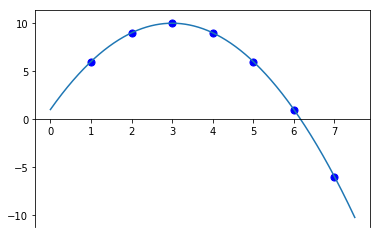

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def f(x):
    return -x * x + 6 * x + 1

x = np.linspace(0, 7.5, 1000)
y = [(f(i)) for i in x]
plt.plot(x, y)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))

x0 = [1, 2, 3, 4, 5, 6, 7, ]
y0 = [(f(i)) for i in x0]
plt.scatter(x0, y0, s=50, color='b')

上图描述训练样本的点以及一条其对应的最佳拟合曲线。归纳偏好可看做学习算法自身在一个可能很庞大的假设空间中对假设进行选择的启发式或“价值观”。一般的我们会遵循**奥卡姆剃刀（Occam's razor）**规则，即最简原则。如同我们绘制出的平滑二次方程式$y=-x^2+6x+1$。而使用其他的拟合曲线其不符合最简原则，所以我们可以说 **A 与训练集外的样本更一致，也就是说 A 的泛化能力要比其他方案强**。

---

## 习题知识点补充

### 版本空间

**版本空间**指的是所有假设组成的空间，我们可以把学习过程看作是在假设空间中搜索的过程，搜索目标是寻找与训练集“匹配”的假设。**这里的假设是带有泛化取值（统配符）的**。

### 归纳偏好

在训练过程中选择满足最多样本的假设。

## ch01 Exercise (P19)

### 习题 1.1

**1.1** 表 1.1 中只包含编号为 1 和 4 的两个样例，试给出响应的版本空间。


| 编号 | 色泽 | 根蒂 | 敲声 | 好瓜 |
| ------| ------ | ------ | ----- | ----- | 
| 1 | 青绿 | 蜷缩 | 浊响 | 是 |
| 2 | 乌黑 | 蜷缩 | 浊响 | 是 |
| 3 | 青绿 | 硬挺 | 清脆 | 否 |
| 4 | 乌黑 | 稍蜷 | 沉闷 | 否 |

### 个人作答

假设有$n$种属性，第$i$个属性可能取值为$t_i$，由于版本空间需要加上通配符的泛化值，所以可能的假设有以下数量：

$$
t_1\times t_2\times \dots \times t_n \times t_{i+1} = \prod_i (t_i+1)
$$

另外我们需要算上空集，用来表示没有正例。所以最终数量为 $\prod_i (t_i+1)+1$。

根据题意，我们对假设进行剔除操作，从而得到精简数据集：

| 编号 | 色泽 | 根蒂 | 敲声 | 好瓜 |
| ------| ------ | ------ | ----- | ----- | 
| 1 | 青绿 | 蜷缩 | 浊响 | 是 |
| 2 | 乌黑 | 稍蜷 | 沉闷 | 否 |

数据集有 3 个属性，每个属性有两个取值，根据上方推倒的版本空间数量公式，一共有 $3\times 3\times 3+1=28$ 种假设：


1. 色泽=青绿 根蒂=蜷缩 敲声=浊响
2. 色泽=青绿 根蒂=蜷缩 敲声=沉闷
3. 色泽=青绿 根蒂=稍蜷 敲声=浊响
4. 色泽=青绿 根蒂=稍蜷 敲声=沉闷
5. 色泽=乌黑 根蒂=蜷缩 敲声=浊响
6. 色泽=乌黑 根蒂=蜷缩 敲声=沉闷
7. 色泽=乌黑 根蒂=稍蜷 敲声=浊响
8. 色泽=乌黑 根蒂=稍蜷 敲声=沉闷
9. 色泽=青绿 根蒂=蜷缩 敲声=*
10. 色泽=青绿 根蒂=稍蜷 敲声=*
11. 色泽=乌黑 根蒂=蜷缩 敲声=*
12. 色泽=乌黑 根蒂=稍蜷 敲声=*
13. 色泽=青绿 根蒂=* 敲声=浊响
14. 色泽=青绿 根蒂=* 敲声=沉闷
15. 色泽=乌黑 根蒂=* 敲声=浊响
16. 色泽=乌黑 根蒂=* 敲声=沉闷
17. 色泽=* 根蒂=蜷缩 敲声=浊响
18. 色泽=* 根蒂=蜷缩 敲声=沉闷
19. 色泽=* 根蒂=稍蜷 敲声=浊响
20. 色泽=* 根蒂=稍蜷 敲声=沉闷
21. 色泽=青绿 根蒂=* 敲声=*
22. 色泽=乌黑 根蒂=* 敲声=*
23. 色泽=* 根蒂=蜷缩 敲声=*
24. 色泽=* 根蒂=稍蜷 敲声=*
25. 色泽=* 根蒂=* 敲声=浊响
26. 色泽=* 根蒂=* 敲声=沉闷
27. 色泽=* 根蒂=* 敲声=*
28. 空集Ø 

### 习题 1.2

**1.2** 与使用单个合取式来进行假设表示相比，使用“析合范式”将使得假设空间具有更强的表示能力。例如：

$$
好瓜 \leftrightarrow ((色泽=*)\wedge (根蒂=蜷缩)\wedge (敲声=*))\vee ((色泽=乌黑)\wedge (根蒂=*)\wedge (敲声=沉闷))
$$

会把“（(色泽=青绿)∧(根蒂=蜷缩)∧(敲声=清脆)）”以及“（(色泽=乌黑)∧(根蒂=硬挺)∧(敲声=沉闷)）”都分类为“好瓜”。若使用最多包含$k$个合取式的析合范式来表达表 **1.1** 西瓜分类问题的假设空间，试估算共有多少种可能的假设。

### 个人作答

| 编号 | 色泽 | 根蒂 | 敲声 | 好瓜 |
| ------| ------ | ------ | ----- | ----- | 
| 1 | 青绿 | 蜷缩 | 浊响 | 是 |
| 2 | 乌黑 | 蜷缩 | 浊响 | 是 |
| 3 | 青绿 | 硬挺 | 清脆 | 否 |
| 4 | 乌黑 | 稍蜷 | 沉闷 | 否 |

色泽属性两个：青绿和乌黑。根蒂属性三个：蜷缩、硬挺和稍蜷。敲声属性三个：浊响、清脆和沉闷。确定以后计算一下假设空间：

$$
\prod_i (t_i+1)+1=3\times 4\times4+1=49
$$

故确定 $k_{max}=49$。我们可以确定若包含$k$个何取式，其析合范式有如下多种可能：

$$
\sum_{k=0}^{49}{49 \choose k}=2^{49}
$$


这个结果是考虑冗余情况的。

### 习题 1.3

**1.3** 若数据包括噪声，则假设空间中有可能不存在与所有训练样本都一致的假设。在此情形下，试设计一种归纳偏好用于假设选择。

### 个人作答

只需要考虑归纳偏好尽可能与问题相匹配即可，这里可使归纳偏好与噪声分布匹配。

